# Problem: Train an Autoencoder for Anomaly Detection

### Problem Statement
You are tasked with implementing an **autoencoder** model for anomaly detection. The model will be trained on the **MNIST dataset**, and anomalies will be detected based on the reconstruction error. The autoencoder consists of an encoder to compress the input and a decoder to reconstruct the image. The difference between the original image and the reconstructed image will be used to detect anomalies.

### Requirements
1. **Define the Autoencoder Architecture**:
   - **Encoder**:
     - Implement a series of convolutional layers followed by max-pooling layers.
     - The encoder should progressively reduce the spatial dimensions of the input image, capturing the most important features.
   - **Decoder**:
     - Implement a series of transposed convolutional layers (also known as deconvolutional layers) to upsample the compressed representation back to the original image size.
     - Use a **Sigmoid activation** function in the final layer to ensure that the output pixel values are between 0 and 1.

2. **Forward Pass**:
   - Implement the forward method where the input image is passed through the encoder to obtain a compressed representation, followed by passing it through the decoder to reconstruct the image.

### Constraints
- The autoencoder should work on the MNIST dataset, which consists of 28x28 grayscale images.
- Ensure that the output of the decoder matches the original image size.
- Use **Sigmoid activation** in the final layer to constrain the output pixel values between 0 and 1.

<details>
  <summary>💡 Hint</summary>
  Focus on the encoder to downsample the input and the decoder to upsample and reconstruct the image.
</details>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchinfo import summary


In [2]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:29<00:00, 337163.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 126134.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:05<00:00, 275673.72it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2613241.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [16]:
help(torch.nn.Sequential)

Help on class Sequential in module torch.nn.modules.container:

class Sequential(torch.nn.modules.module.Module)
 |  Sequential(*args)
 |  
 |  A sequential container.
 |  Modules will be added to it in the order they are passed in the
 |  constructor. Alternatively, an ``OrderedDict`` of modules can be
 |  passed in. The ``forward()`` method of ``Sequential`` accepts any
 |  input and forwards it to the first module it contains. It then
 |  "chains" outputs to inputs sequentially for each subsequent module,
 |  finally returning the output of the last module.
 |  
 |  The value a ``Sequential`` provides over manually calling a sequence
 |  of modules is that it allows treating the whole container as a
 |  single module, such that performing a transformation on the
 |  ``Sequential`` applies to each of the modules it stores (which are
 |  each a registered submodule of the ``Sequential``).
 |  
 |  What's the difference between a ``Sequential`` and a
 |  :class:`torch.nn.ModuleList`? A

In [32]:
def get_nn_layer_parameters(layer):
    return sum(p.numel() for p in layer.parameters())


In [ ]:
# # Define an Autoencoder model
# # TODO: Implement the autoencoder architecture
# class Autoencoder(nn.Module):
#     def __init__(self):
#         # init
#         super().__init__()
#         ###########################################################################
#         ############################## ENCODER LAYERS #############################
#         ###########################################################################
#         # Encoder - input image is of shape = batch_size x 1 x 28 x 28
        
#         conv_layer_11 = torch.nn.Conv2d(
#             in_channels=1,
#             out_channels=16,
#             kernel_size=3,
#             # stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 16 x 26 x 26
#         conv_layer_12 = torch.nn.Conv2d(
#             in_channels=16,
#             out_channels=16,
#             kernel_size=3,
#             # stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 16 x 24 x 24
#         max_pool_1 = torch.nn.MaxPool2d(
#             kernel_size=2
#         )   # output shape = batch_size x 16 x 12 x 12
#         conv_layer_21 = torch.nn.Conv2d(
#             in_channels=16,
#             out_channels=32,
#             kernel_size=5,
#             # stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 32 x 8 x 8
#         conv_layer_22 = torch.nn.Conv2d(
#             in_channels=32,
#             out_channels=32,
#             kernel_size=5,
#             # stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 32 x 4 x 4
#         flatten = torch.nn.Flatten(
#             start_dim = 1,
#             end_dim = -1
#         ) # output shape = batch_size x 512
#         relu = torch.nn.ReLU(inplace=True)

#         ###########################################################################
#         ############################## DECODER LAYERS #############################
#         ###########################################################################
#         unflatten = torch.nn.Unflatten(
#             dim=1,
#             unflattened_size=(32,4,4)
#         ) # output shape = batch_size x 32 x 4 x 4
#         deconv_layer_22 = torch.nn.ConvTranspose2d(
#             in_channels=32,
#             out_channels=32,
#             kernel_size=5
#         )   # output shape = batch_size x 32 x 8 x 8
#         deconv_layer_21 = torch.nn.ConvTranspose2d(
#             in_channels=32,
#             out_channels=16,
#             kernel_size=5
#         )   # output shape = batch_size x 32 x 12 x 12
#         # max_unpool_1 = torch.nn.MaxUnpool2d(
#         #     kernel_size=2
#         # )   # output shape = batch_size x 16 x 24 x 24
#         upsample = torch.nn.Upsample(
#             size=None,
#             scale_factor=2,
#             mode='nearest'
#         )
#         deconv_layer_12 = torch.nn.ConvTranspose2d(
#             in_channels=16,
#             out_channels=16,
#             kernel_size=3
#         )   # output shape = batch_size x 16 x 26 x 26
#         deconv_layer_11 = torch.nn.ConvTranspose2d(
#             in_channels=16,
#             out_channels=1,
#             kernel_size=3
#         )   # output shape = batch_size x 1 x 28 x 28
        
        
#         ###########################################################################
#         ################################ AUTOENCODER ##############################
#         ###########################################################################
        
#         # Encoder - Decoder layer
#         self.encoder = torch.nn.Sequential(
#             conv_layer_11,
#             relu,
#             conv_layer_12,
#             relu,
#             max_pool_1,
#             conv_layer_21,
#             relu,
#             conv_layer_22,
#             flatten
#         )
#         # Decoder
#         self.decoder = torch.nn.Sequential(
#             unflatten,
#             deconv_layer_22,
#             relu,
#             deconv_layer_21,
#             relu,
#             upsample,
#             deconv_layer_12,
#             relu,
#             deconv_layer_11
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

In [ ]:
# # Define an Autoencoder model
# # TODO: Implement the autoencoder architecture
# class Autoencoder(nn.Module):
#     def __init__(self):
#         # init
#         super().__init__()
#         ###########################################################################
#         ############################## ENCODER LAYERS #############################
#         ###########################################################################
#         # Encoder - input image is of shape = batch_size x 1 x 28 x 28
        
#         conv_layer_11 = torch.nn.Conv2d(
#             in_channels=1,
#             out_channels=8,
#             kernel_size=3,
#             stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 16 x 13 x 13
#         conv_layer_12 = torch.nn.Conv2d(
#             in_channels=8,
#             out_channels=8,
#             kernel_size=4,
#             stride=2,
#             # padding
#             # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
#         )   # output shape = batch_size x 8 x 5 x 5
#         flatten = torch.nn.Flatten(
#             start_dim = 1,
#             end_dim = -1
#         ) # output shape = batch_size x 200
#         relu = torch.nn.ReLU(inplace=True)

#         ###########################################################################
#         ############################## DECODER LAYERS #############################
#         ###########################################################################
#         unflatten = torch.nn.Unflatten(
#             dim=1,
#             unflattened_size=(8,5,5)
#         ) # output shape = batch_size x 8 x 5 x 5
#         deconv_layer_22 = torch.nn.ConvTranspose2d(
#             in_channels=8,
#             out_channels=8,
#             kernel_size=5,
#             stride=2
#         )   # output shape = batch_size x 8 x 13 x 13
#         deconv_layer_21 = torch.nn.ConvTranspose2d(
#             in_channels=8,
#             out_channels=1,
#             kernel_size=4,
#             stride=2
#         )   # output shape = batch_size x 1 x 28 x 28
        
#         ###########################################################################
#         ################################ AUTOENCODER ##############################
#         ###########################################################################
        
#         # Encoder - Decoder layer
#         self.encoder = torch.nn.Sequential(
#             conv_layer_11,
#             relu,
#             conv_layer_12,
#             flatten
#         )
#         # Decoder
#         self.decoder = torch.nn.Sequential(
#             unflatten,
#             deconv_layer_22,
#             relu,
#             deconv_layer_21,
            
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

In [216]:
help(torch.nn.BatchNorm2d)

Help on class BatchNorm2d in module torch.nn.modules.batchnorm:

class BatchNorm2d(_BatchNorm)
 |  BatchNorm2d(num_features: int, eps: float = 1e-05, momentum: float = 0.1, affine: bool = True, track_running_stats: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs
 |  with additional channel dimension) as described in the paper
 |  `Batch Normalization: Accelerating Deep Network Training by Reducing
 |  Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .
 |  
 |  .. math::
 |  
 |      y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta
 |  
 |  The mean and standard-deviation are calculated per-dimension over
 |  the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
 |  of size `C` (where `C` is the input size). By default, the elements of :math:`\gamma` are set
 |  to 1 and the elements of :math:`\beta` are set to 0. The standard-devia

In [224]:
# Define an Autoencoder model
# TODO: Implement the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        # init
        super().__init__()
        ###########################################################################
        ############################## ENCODER LAYERS #############################
        ###########################################################################
        # Encoder - input image is of shape = batch_size x 1 x 28 x 28
        
        conv_layer_11 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=8,
            kernel_size=3,
            stride=2,
            # padding
            # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
        )   # output shape = batch_size x 16 x 13 x 13
        batch_norm_11 = torch.nn.BatchNorm2d(
            num_features=8
        )
        conv_layer_12 = torch.nn.Conv2d(
            in_channels=8,
            out_channels=8,
            kernel_size=4,
            stride=2,
            # padding
            # in_channels: int, out_channels: int, kernel_size: Union[int, Tuple[int, int]], stride: Union[int, Tuple[int, int]] = 1, padding: Union[str, int, Tuple[int, int]] = 0, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None
        )   # output shape = batch_size x 8 x 5 x 5
        flatten = torch.nn.Flatten(
            start_dim = 1,
            end_dim = -1
        ) # output shape = batch_size x 200
        relu = torch.nn.ReLU(inplace=True)

        ###########################################################################
        ############################## DECODER LAYERS #############################
        ###########################################################################
        unflatten = torch.nn.Unflatten(
            dim=1,
            unflattened_size=(8,5,5)
        ) # output shape = batch_size x 8 x 5 x 5
        deconv_layer_22 = torch.nn.ConvTranspose2d(
            in_channels=8,
            out_channels=8,
            kernel_size=5,
            stride=2
        )   # output shape = batch_size x 8 x 13 x 13
        batch_norm_22 = torch.nn.BatchNorm2d(
            num_features=8
        )
        deconv_layer_21 = torch.nn.ConvTranspose2d(
            in_channels=8,
            out_channels=1,
            kernel_size=4,
            stride=2
        )   # output shape = batch_size x 1 x 28 x 28
        ###########################################################################
        ################################ AUTOENCODER ##############################
        ###########################################################################
        
        # Encoder - Decoder layer
        self.encoder = torch.nn.Sequential(
            conv_layer_11,
            batch_norm_11,
            relu,
            conv_layer_12,
            flatten
        )
        # Decoder
        self.decoder = torch.nn.Sequential(
            unflatten,
            deconv_layer_22,
            batch_norm_22,
            relu,
            deconv_layer_21,
            
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [225]:
model = Autoencoder()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 8, kernel_size=(4, 4), stride=(2, 2))
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): Sequential(
    (0): Unflatten(dim=1, unflattened_size=(8, 5, 5))
    (1): ConvTranspose2d(8, 8, kernel_size=(5, 5), stride=(2, 2))
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(4, 4), stride=(2, 2))
  )
)


In [226]:
from torchinfo import summary
summary(model, input_size=(64,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [64, 1, 28, 28]           --
├─Sequential: 1-1                        [64, 200]                 1,032
│    └─Conv2d: 2-1                       [64, 8, 13, 13]           80
│    └─BatchNorm2d: 2-2                  [64, 8, 13, 13]           16
├─Sequential: 1-2                        --                        (recursive)
│    └─ReLU: 2-3                         [64, 8, 13, 13]           --
├─Sequential: 1-3                        --                        (recursive)
│    └─Conv2d: 2-4                       [64, 8, 5, 5]             1,032
│    └─Flatten: 2-5                      [64, 200]                 --
├─Sequential: 1-4                        [64, 1, 28, 28]           --
│    └─Unflatten: 2-6                    [64, 8, 5, 5]             --
│    └─ConvTranspose2d: 2-7              [64, 8, 13, 13]           1,608
│    └─BatchNorm2d: 2-8                  [64, 8, 13, 13]  

In [223]:
# Training loop
epochs = 10

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0280
Epoch [2/10], Loss: 0.0243
Epoch [3/10], Loss: 0.0236
Epoch [4/10], Loss: 0.0208
Epoch [5/10], Loss: 0.0183
Epoch [6/10], Loss: 0.0204
Epoch [7/10], Loss: 0.0177
Epoch [8/10], Loss: 0.0162
Epoch [9/10], Loss: 0.0159
Epoch [10/10], Loss: 0.0164


In [215]:
# Training loop
epochs = 10

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.9249
Epoch [2/10], Loss: 0.9258
Epoch [3/10], Loss: 0.9226
Epoch [4/10], Loss: 0.9253
Epoch [5/10], Loss: 0.9297
Epoch [6/10], Loss: 0.9214
Epoch [7/10], Loss: 0.9269
Epoch [8/10], Loss: 0.9277
Epoch [9/10], Loss: 0.9277
Epoch [10/10], Loss: 0.9269


In [197]:
# Training loop
epochs = 10

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0271
Epoch [2/10], Loss: 0.0178
Epoch [3/10], Loss: 0.0180
Epoch [4/10], Loss: 0.0165
Epoch [5/10], Loss: 0.0156
Epoch [6/10], Loss: 0.0146
Epoch [7/10], Loss: 0.0123
Epoch [8/10], Loss: 0.0126
Epoch [9/10], Loss: 0.0127
Epoch [10/10], Loss: 0.0120


### Visualise ground truth and reconstructed images

In [198]:
# Detect anomalies using reconstruction error
threshold = 0.001  # Define a threshold for anomaly detection
model.eval()
gt_reconstructed_images = []
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed = model(images)
        loss = nn.MSELoss(reduction='none')(reconstructed, images).mean(dim=(1,2,3))
        gt_reconstructed_images.extend(zip(images, reconstructed, loss))
        # gt_reconstructed_images.append([images, reconstructed, loss])
gt_reconstructed_images = sorted(gt_reconstructed_images, key=lambda x: x[2], reverse=True)

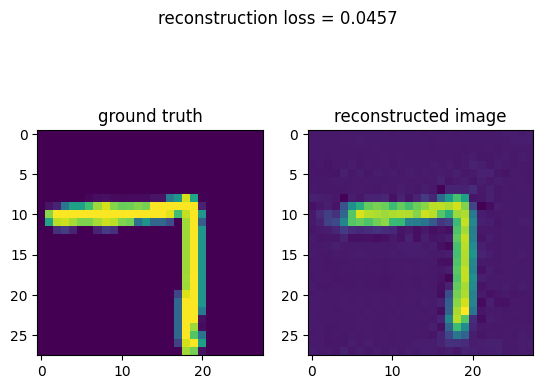

In [211]:
# Visualize anomalies
index = np.random.randint(1,10000)
index = 6
gt_image, reconstructed_image, loss = gt_reconstructed_images[index][0].squeeze(), gt_reconstructed_images[index][1].squeeze(), gt_reconstructed_images[index][2].item()

f, ax = plt.subplots(1,2)
ax[0].imshow(gt_image.cpu().numpy())
ax[1].imshow(reconstructed_image.cpu().numpy())
ax[0].set_title("ground truth")
ax[1].set_title("reconstructed image")
# plt.suptitle(f"reconstruction loss = {np.round(loss.item(),4)}")
plt.suptitle(f"reconstruction loss = {round(loss, 4)}")
plt.show()

### Anomaly detection

In [88]:
# Detect anomalies using reconstruction error
threshold = 0.001  # Define a threshold for anomaly detection
model.eval()
anomalies = []
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        
        # If reconstruction error exceeds the threshold, mark it as an anomaly
        if loss.item() > threshold:
            anomalies.append(images)

Anomaly image shape: torch.Size([28, 28])


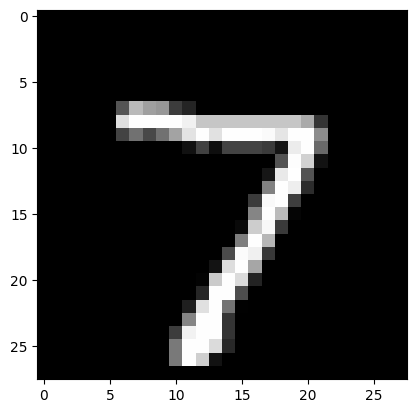

In [89]:
# Visualize anomalies
if anomalies:
    # Select the first anomaly and remove the channel dimension for visualization
    anomaly_image = anomalies[0][0].squeeze()  # Remove the channel dimension (1)
    print(f"Anomaly image shape: {anomaly_image.shape}")  # Optional: Check the shape of the image
    plt.imshow(anomaly_image.cpu().numpy(), cmap='gray')  # Convert tensor to NumPy array for visualization
    plt.show()
else:
    print("No anomalies detected.")
